In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB as Classifier
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
def evaluate_naive_bayes(dataset,target_col,K_values):
    for K in K_values:
        x_train,x_test,y_train,y_test=train_test_split(dataset.drop(columns=[target_col]),dataset[target_col],test_size=(1-K/10),random_state=42)
        Clf=Classifier()
        Clf.fit(x_train.values,y_train.values)
        y_pred=Clf.predict(x_test.values)
        accuracy=accuracy_score(y_test,y_pred)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, cmap='Blues')
        plt.show()
        print(f"Split {K*10}-{100-K*10} Accuracy:{accuracy:.2f}")

In [11]:
iris_data = load_dataset('iris')

In [12]:
titanic_data=pd.read_csv('titanic.csv')

In [13]:
titanic_data=titanic_data.drop(columns=['PassengerId','Name','Ticket','Cabin'])
titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)
titanic_data=pd.get_dummies(titanic_data,columns=['Sex','Embarked'])

C:\Users\beana\AppData\Local\Temp\ipykernel_16312\439497334.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True)
C:\Users\beana\AppData\Local\Temp\ipykernel_16312\439497334.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

<Axes: >

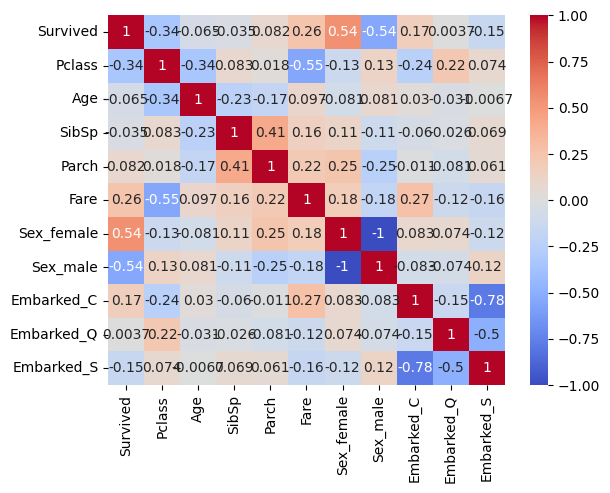

In [14]:
correlation_matrix = titanic_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

Iris Dataset Naive Bayes Classifier Results


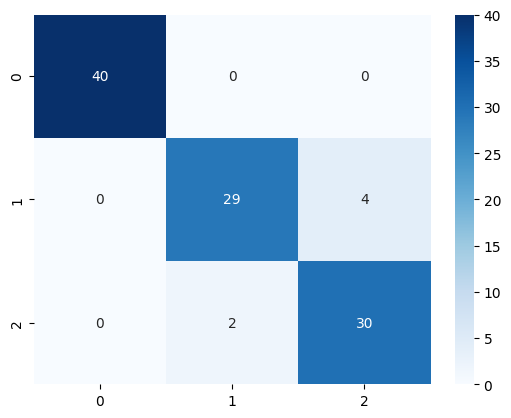

Split 30-70 Accuracy:0.94


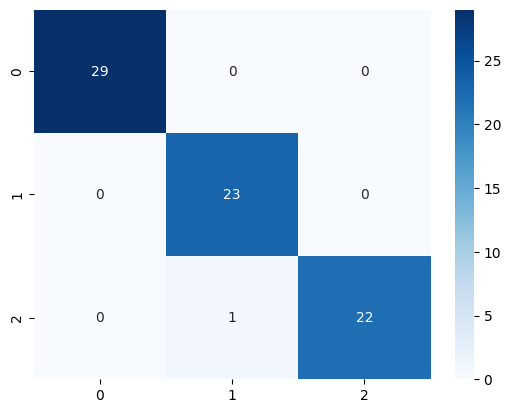

Split 50-50 Accuracy:0.99


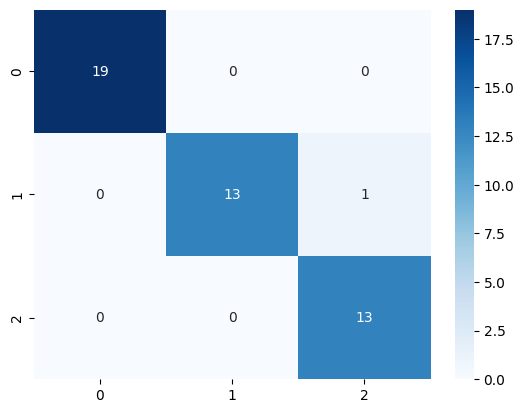

Split 70-30 Accuracy:0.98


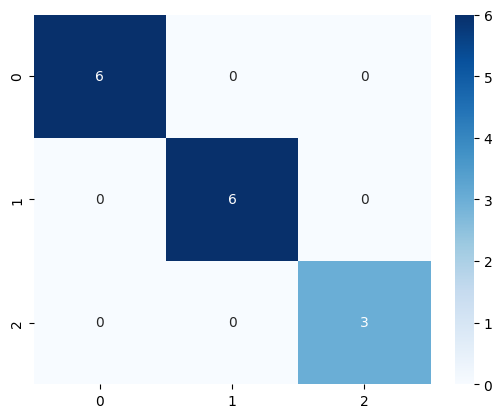

Split 90-10 Accuracy:1.00


In [15]:
print("Iris Dataset Naive Bayes Classifier Results")
evaluate_naive_bayes(iris_data,'species',[3,5,7,9])


Titanic dataset Naive Bayes Classifier Results: 


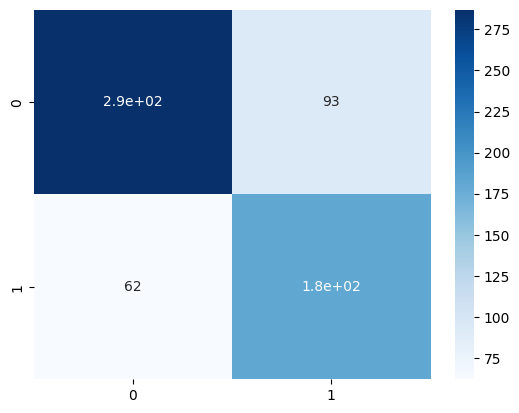

Split 30-70 Accuracy:0.75


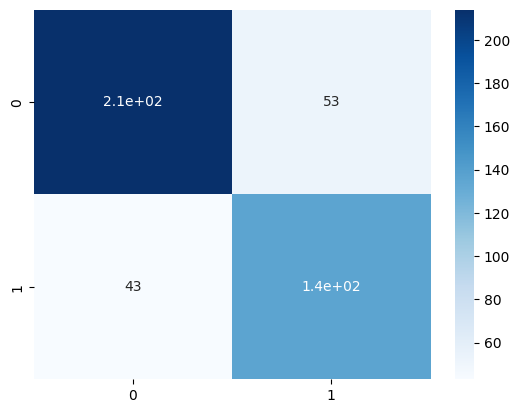

Split 50-50 Accuracy:0.78


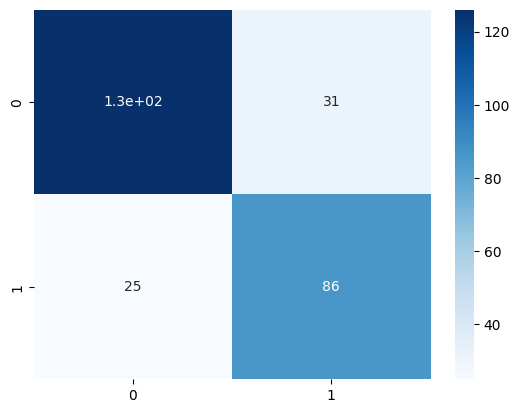

Split 70-30 Accuracy:0.79


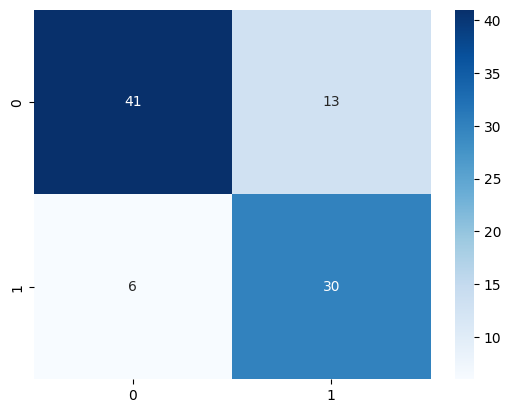

Split 90-10 Accuracy:0.79


In [16]:
print("\nTitanic dataset Naive Bayes Classifier Results: ")
evaluate_naive_bayes(titanic_data,'Survived',[3,5,7,9])